In [ ]:
from google.colab import drive
import pandas as pd



# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/chargingstations.csv")\

df.head()

,ZipCode,Charging Station,Address,City,State,Latitude,Longitude,Start Date,End Date,Total Duration,Charging Time,Charging Port Type,Charging Ports,Plug Type,Energy Consumed,Charges
0,94301,PALO ALTO CA / BRYANT # 1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,9/6/20 11:22,9/6/20 13:03,1:40:27,1:40:16,Level 2,1,J1772,5.355,1.23
1,94301,PALO ALTO CA / BRYANT # 1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,9/7/20 12:51,9/7/20 13:44,0:53:04,0:52:09,Level 2,1,J1772,5.297,1.22
2,94301,PALO ALTO CA / BRYANT # 1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/13/20 13:40,10/13/20 15:01,1:20:57,1:20:35,Level 2,1,J1772,4.361,1.00
3,94301,PALO ALTO CA / BRYANT # 1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/14/20 9:23,10/15/20 7:52,22:29:11,7:12:13,Level 2,1,J1772,42.064,38.97
4,94301,PALO ALTO CA / BRYANT # 1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/17/20 16:22,10/17/20 17:18,0:56:18,0:55:51,Level 2,1,J1772,5.430,1.25


In [ ]:
df.columns

Index(['ZipCode', 'Charging Station', 'Address', 'City', 'State', 'Latitude',
       'Longitude', 'Start Date', 'End Date', 'Total Duration',
       'Charging Time', 'Charging Port Type', 'Charging Ports', 'Plug Type',
       'Energy Consumed', 'Charges'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ZipCode             259415 non-null  int64  
 1   Charging Station    259415 non-null  object 
 2   Address             259415 non-null  object 
 3   City                259415 non-null  object 
 4   State               259415 non-null  object 
 5   Latitude            259415 non-null  float64
 6   Longitude           259415 non-null  float64
 7   Start Date          259415 non-null  object 
 8   End Date            259415 non-null  object 
 9   Total Duration      259415 non-null  object 
 10  Charging Time       259415 non-null  object 
 11  Charging Port Type  259406 non-null  object 
 12  Charging Ports      259415 non-null  int64  
 13  Plug Type           259415 non-null  object 
 14  Energy Consumed     259415 non-null  float64
 15  Charges             259415 non-nul

In [ ]:
df.isnull().sum()

ZipCode               0
Charging Station      0
Address               0
City                  0
State                 0
Latitude              0
Longitude             0
Start Date            0
End Date              0
Total Duration        0
Charging Time         0
Charging Port Type    9
Charging Ports        0
Plug Type             0
Energy Consumed       0
Charges               0
dtype: int64

In [ ]:
import pandas as pd

def convert_duration(duration_str):
    parts = duration_str.split(':')
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds = int(parts[2])
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

# Convert 'Start Date' and 'End Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%y %H:%M', errors='coerce')




<ipython-input-6-247132415e3e>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Date'] = pd.to_datetime(df['Start Date'])


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Charging Time' is the column name
# Replace df with your actual DataFrame name and adjust column names if needed

# Convert 'Charging Time' to timedelta
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])
df['Total Duration'] =  pd.to_timedelta( df['Total Duration'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ZipCode             259415 non-null  int64          
 1   Charging Station    259415 non-null  object         
 2   Address             259415 non-null  object         
 3   City                259415 non-null  object         
 4   State               259415 non-null  object         
 5   Latitude            259415 non-null  float64        
 6   Longitude           259415 non-null  float64        
 7   Start Date          259415 non-null  datetime64[ns] 
 8   End Date            259375 non-null  datetime64[ns] 
 9   Total Duration      259415 non-null  timedelta64[ns]
 10  Charging Time       259415 non-null  timedelta64[ns]
 11  Charging Port Type  259406 non-null  object         
 12  Charging Ports      259415 non-null  int64          
 13  Plug Type     

In [ ]:
df.describe()

,ZipCode,Latitude,Longitude,Start Date,End Date,Total Duration,Charging Time,Charging Ports,Energy Consumed,Charges
count,259415.000000,259415.000000,259415.000000,259415,259375,259415,259415,259415.000000,259415.000000,259415.000000
mean,94302.315768,37.439573,-122.151210,2017-06-15 03:19:32.322957824,2017-06-15 05:55:17.193484288,0 days 02:29:12.554960198,0 days 01:59:56.845120752,1.591627,8.544277,1.097481
min,94301.000000,37.422104,-122.163239,2011-07-29 20:17:00,2011-07-29 23:20:00,0 days 00:01:00,0 days 00:00:06,1.000000,0.010000,0.000000
25%,94301.000000,37.428318,-122.161919,2016-04-12 21:31:00,2016-04-12 22:29:00,0 days 01:10:15,0 days 01:02:24,1.000000,3.784000,0.000000
50%,94301.000000,37.444489,-122.158272,2017-07-15 10:51:00,2017-07-15 13:32:00,0 days 02:05:21,0 days 01:48:59,2.000000,6.868634,0.000000
75%,94303.000000,37.446651,-122.145699,2019-01-25 08:33:30,2019-01-25 12:10:30,0 days 03:05:24,0 days 02:41:50,2.000000,11.458340,1.640000
max,94306.000000,37.449375,-122.112480,2020-12-31 18:19:00,2021-01-04 21:01:00,4 days 18:32:21,0 days 22:55:55,2.000000,97.360000,84.560000
std,1.941657,0.009627,0.015344,NaN,NaN,0 days 02:12:45.581056017,0 days 01:22:57.301970773,0.491534,7.185462,1.934408


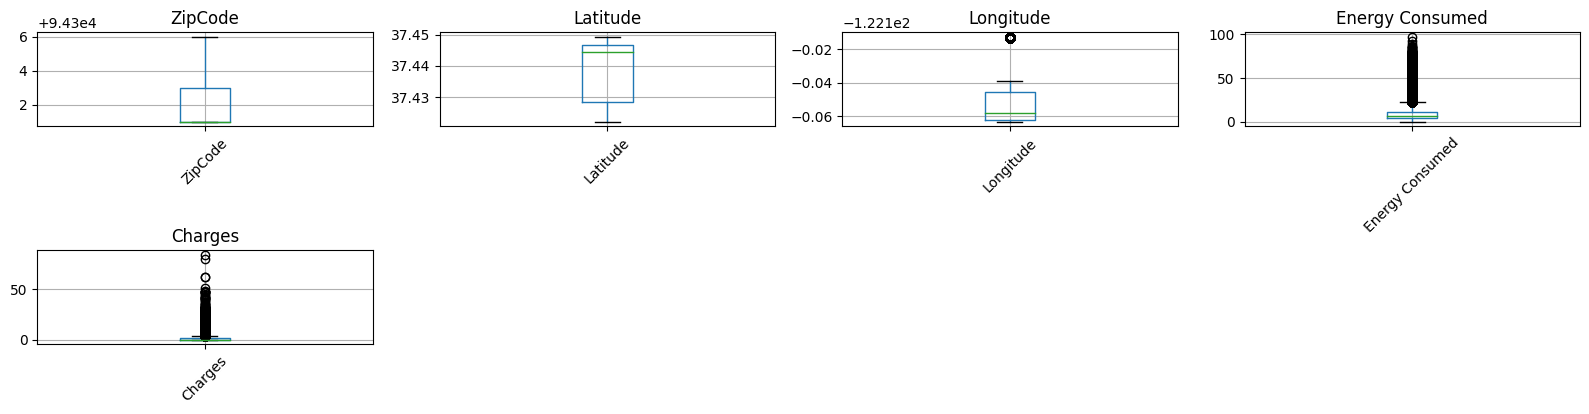

Number of outliers in 'ZipCode': 0
Number of outliers in 'Latitude': 0
Number of outliers in 'Longitude': 28326
Number of outliers in 'Energy Consumed': 8696
Number of outliers in 'Charges': 14371


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming df is your DataFrame with the specified columns
# Replace df with the actual name of your DataFrame

# Define the columns of interest
columns_of_interest = ['ZipCode', 'Latitude',
                       'Longitude',
                       'Energy Consumed', 'Charges']

# Create boxplots for each column
plt.figure(figsize=(16, 8))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 4, i)
    df.boxplot(column=column)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Identify outliers using the IQR method
outliers_count = {}
for column in columns_of_interest:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Print the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")


In [ ]:
# Calculate the number of outliers for 'End Date'
lower_limit_end_date = df['End Date'].quantile(0.01)
upper_limit_end_date = df['End Date'].quantile(0.99)
num_outliers_end_date = ((df['End Date'] < lower_limit_end_date) | (df['End Date'] > upper_limit_end_date)).sum()

# Calculate the number of outliers for 'Total Duration'
lower_limit_total_duration = df['Total Duration'].quantile(0.01)
upper_limit_total_duration = df['Total Duration'].quantile(0.99)
num_outliers_total_duration = ((df['Total Duration'] < lower_limit_total_duration) | (df['Total Duration'] > upper_limit_total_duration)).sum()

# Calculate the number of outliers for 'Charging Time'
lower_limit_charging_time = df['Charging Time'].quantile(0.01)
upper_limit_charging_time = df['Charging Time'].quantile(0.99)
num_outliers_charging_time = ((df['Charging Time'] < lower_limit_charging_time) | (df['Charging Time'] > upper_limit_charging_time)).sum()

# Print the number of outliers for each column
print(f"Number of outliers in 'End Date': {num_outliers_end_date}")
print(f"Number of outliers in 'Total Duration': {num_outliers_total_duration}")
print(f"Number of outliers in 'Charging Time': {num_outliers_charging_time}")


Number of outliers in 'End Date': 5188
Number of outliers in 'Total Duration': 5179
Number of outliers in 'Charging Time': 5175


Number of outliers in 'Total Duration': 6415
Number of outliers in 'Charging Time': 3273


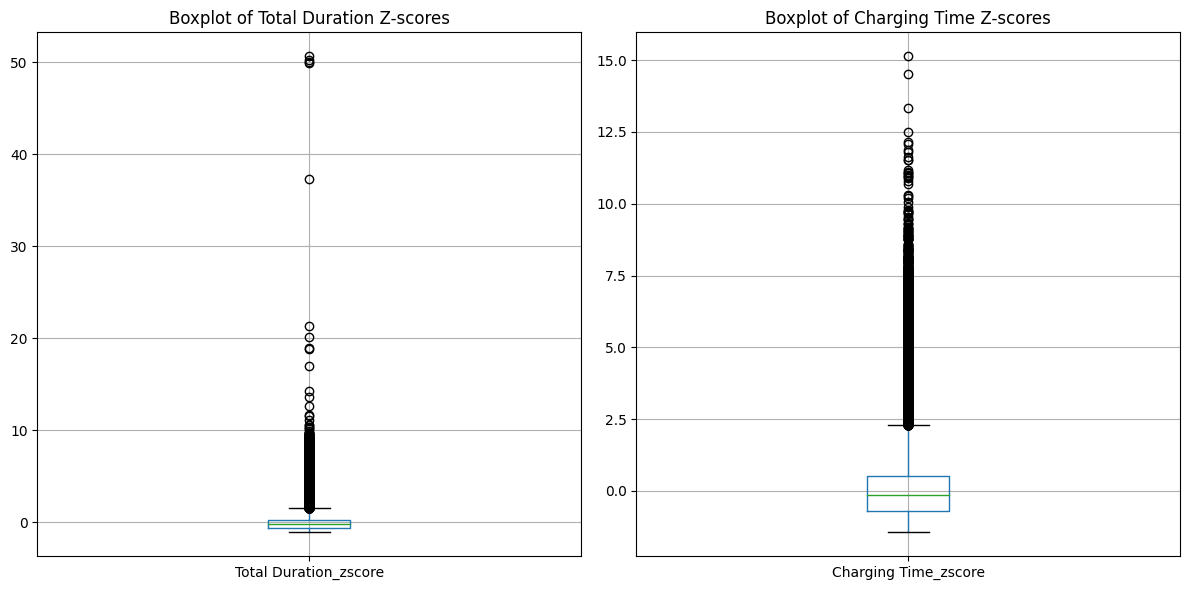

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame

# Calculate z-scores for 'Total Duration' and 'Charging Time'
df['Total Duration_zscore'] = stats.zscore(df['Total Duration'].dt.total_seconds() / 3600)
df['Charging Time_zscore'] = stats.zscore(df['Charging Time'].dt.total_seconds() / 3600)

# Define threshold for identifying outliers
threshold = 3

# Find outliers based on z-score
total_duration_outliers = df[abs(df['Total Duration_zscore']) > threshold]
charging_time_outliers = df[abs(df['Charging Time_zscore']) > threshold]

# Print the number of outliers
print("Number of outliers in 'Total Duration':", len(total_duration_outliers))
print("Number of outliers in 'Charging Time':", len(charging_time_outliers))

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Total Duration_zscore')
plt.title('Boxplot of Total Duration Z-scores')

plt.subplot(1, 2, 2)
df.boxplot(column='Charging Time_zscore')
plt.title('Boxplot of Charging Time Z-scores')

plt.tight_layout()
plt.show()


Number of outliers in 'Start Date': 0


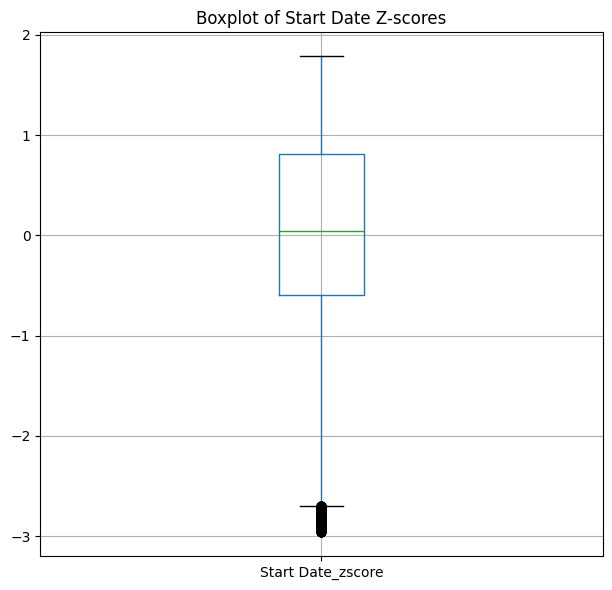

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame

# Convert 'Start Date' and 'End Date' to ordinal representation (numeric values)
df['Start Date_ordinal'] = df['Start Date'].apply(lambda x: x.toordinal())
#df['End Date_ordinal'] = df['End Date'].apply(lambda x: x.toordinal())

# Calculate z-scores for 'Start Date' and 'End Date' using the ordinal representation
df['Start Date_zscore'] = stats.zscore(df['Start Date_ordinal'])
#df['End Date_zscore'] = stats.zscore(df['End Date_ordinal'])

# Define threshold for identifying outliers
threshold = 3

# Find outliers based on z-score
start_date_outliers = df[abs(df['Start Date_zscore']) > threshold]
#end_date_outliers = df[abs(df['End Date_zscore']) > threshold]

# Print the number of outliers
print("Number of outliers in 'Start Date':", len(start_date_outliers))
#print("Number of outliers in 'End Date':", len(end_date_outliers))

# Visualize outliers using boxplots (not recommended for date columns)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Start Date_zscore')
plt.title('Boxplot of Start Date Z-scores')

#plt.subplot(1, 2, 2)
#df.boxplot(column='End Date_zscore')
#plt.title('Boxplot of End Date Z-scores')

plt.tight_layout()
plt.show()


Number of outliers in 'End Date': 0


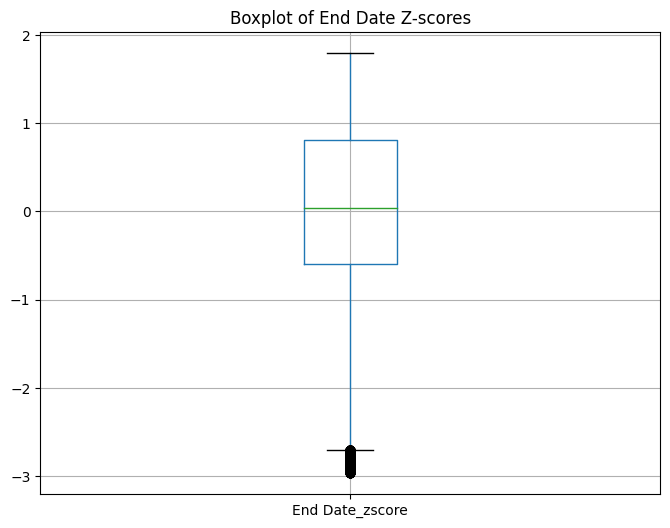

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame

# Drop rows with missing values in 'End Date' column
df = df.dropna(subset=['End Date'])

# Convert 'End Date' to ordinal representation (numeric values)
df['End Date_ordinal'] = df['End Date'].apply(lambda x: x.toordinal())

# Calculate z-scores for 'End Date' using the ordinal representation
df['End Date_zscore'] = stats.zscore(df['End Date_ordinal'])

# Define threshold for identifying outliers
threshold = 3

# Find outliers based on z-score
end_date_outliers = df[abs(df['End Date_zscore']) > threshold]

# Print the number of outliers
print("Number of outliers in 'End Date':", len(end_date_outliers))

# Visualize outliers using a boxplot (not recommended for date columns)
plt.figure(figsize=(8, 6))
df.boxplot(column='End Date_zscore')
plt.title('Boxplot of End Date Z-scores')
plt.show()



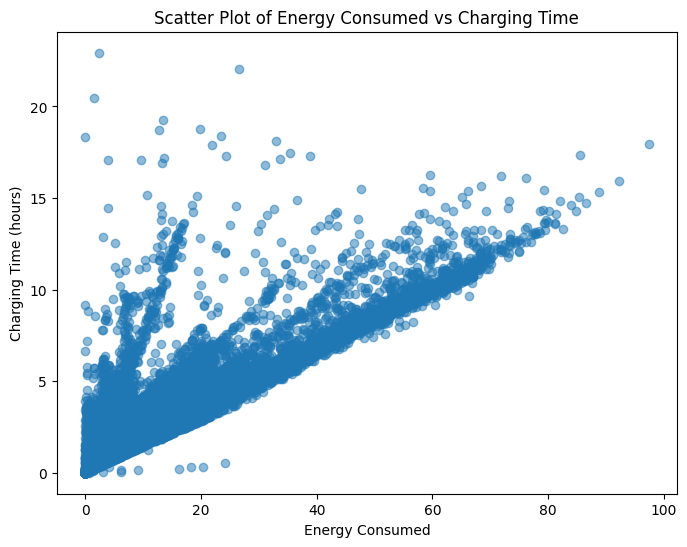

In [ ]:
import matplotlib.pyplot as plt

# Plotting 'Energy Consumed' on the x-axis and 'Charging Time' on the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(df['Energy Consumed'], df['Charging Time'].dt.total_seconds() / 3600, alpha=0.5)
plt.xlabel('Energy Consumed')
plt.ylabel('Charging Time (hours)')
plt.title('Scatter Plot of Energy Consumed vs Charging Time')
plt.show()


In [ ]:
df.describe()

,ZipCode,Latitude,Longitude,Start Date,End Date,Total Duration,Charging Time,Charging Ports,Energy Consumed,Charges,Total Duration_zscore,Charging Time_zscore,Start Date_ordinal,Start Date_zscore,End Date_ordinal,End Date_zscore
count,259375.000000,259375.000000,259375.000000,259375,259375,259375,259375,259375.000000,259375.000000,259375.000000,259375.000000,259375.000000,259375.000000,2.593750e+05,259375.000000,2.593750e+05
mean,94302.315794,37.439573,-122.151211,2017-06-15 03:20:14.105060608,2017-06-15 05:55:17.193484288,0 days 02:29:12.575579759,0 days 01:59:56.918773975,1.591645,8.544399,1.097522,0.000003,0.000015,736494.573128,6.751191e-07,736494.615210,-7.245101e-14
min,94301.000000,37.422104,-122.163239,2011-07-29 20:17:00,2011-07-29 23:20:00,0 days 00:01:00,0 days 00:00:06,1.000000,0.010000,0.000000,-1.116375,-1.444730,734347.000000,-2.963301e+00,734347.000000,-2.963205e+00
25%,94301.000000,37.428318,-122.161919,2016-04-12 19:49:00,2016-04-12 22:29:00,0 days 01:10:15,0 days 01:02:24,1.000000,3.784000,0.000000,-0.594754,-0.693720,736066.000000,-5.913605e-01,736066.000000,-5.913885e-01
50%,94301.000000,37.444489,-122.158272,2017-07-15 11:37:00,2017-07-15 13:32:00,0 days 02:05:21,0 days 01:48:59,2.000000,6.868603,0.000000,-0.179718,-0.132169,736525.000000,4.198481e-02,736525.000000,4.192389e-02
75%,94303.000000,37.446651,-122.145699,2019-01-25 09:12:30,2019-01-25 12:10:30,0 days 03:05:24,0 days 02:41:50,2.000000,11.459000,1.640000,0.272604,0.504924,737084.000000,8.133139e-01,737084.000000,8.132128e-01
max,94306.000000,37.449375,-122.112480,2020-12-31 18:19:00,2021-01-04 21:01:00,4 days 18:32:21,0 days 22:55:55,2.000000,97.360000,84.560000,50.641531,15.140391,737790.000000,1.787479e+00,737794.000000,1.792846e+00
std,1.941677,0.009627,0.015343,NaN,NaN,0 days 02:12:45.813031185,0 days 01:22:57.434257104,0.491530,7.185705,1.934385,1.000031,1.000029,724.779954,1.000078e+00,724.762214,1.000002e+00


In [ ]:
from scipy import stats

# Calculate z-scores for Latitude, Longitude, and Energy Consumed columns
z_scores_latitude = stats.zscore(df['Latitude'])
z_scores_longitude = stats.zscore(df['Longitude'])
z_scores_energy_consumed = stats.zscore(df['Energy Consumed'])

# Define threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 2

# Filter out rows where z-score exceeds the threshold for Latitude, Longitude, and Energy Consumed
df_filtered = df[(abs(z_scores_latitude) <= threshold) &
                 (abs(z_scores_longitude) <= threshold) &
                 (abs(z_scores_energy_consumed) <= threshold)]

# Check the shape of the filtered DataFrame
print("Shape of DataFrame after removing outliers:", df_filtered.shape)


Shape of DataFrame after removing outliers: (223655, 22)


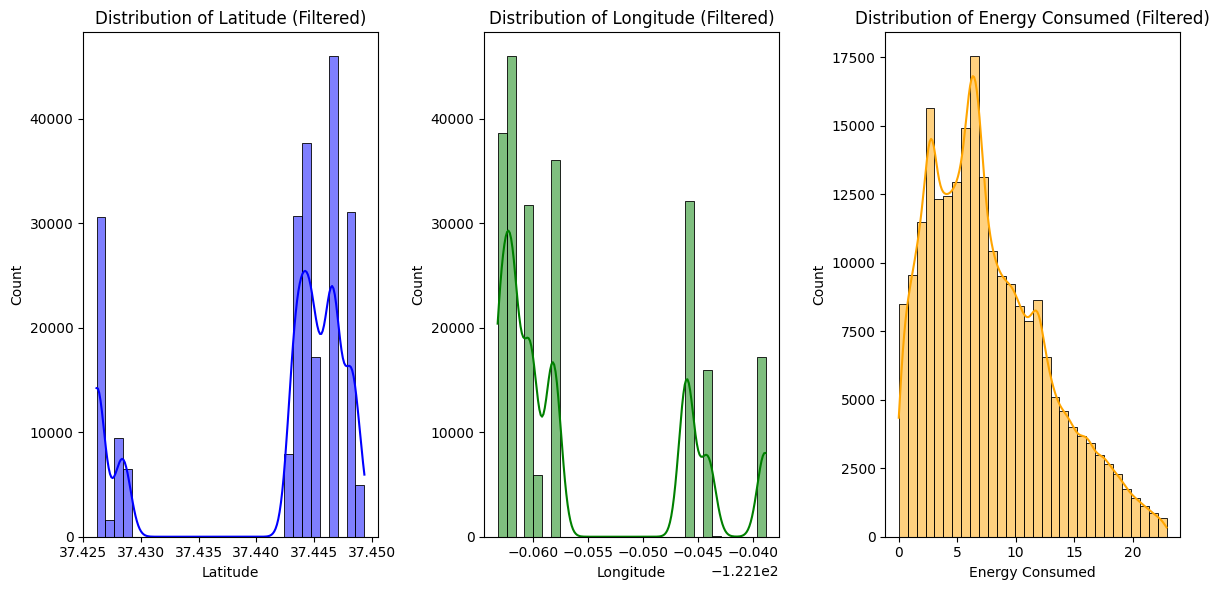

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create subplots for Latitude, Longitude, and Energy Consumed
plt.subplot(1, 3, 1)
sns.histplot(df_filtered['Latitude'], kde=True, color='blue', bins=30)
plt.title('Distribution of Latitude (Filtered)')
plt.xlabel('Latitude')

plt.subplot(1, 3, 2)
sns.histplot(df_filtered['Longitude'], kde=True, color='green', bins=30)
plt.title('Distribution of Longitude (Filtered)')
plt.xlabel('Longitude')

plt.subplot(1, 3, 3)
sns.histplot(df_filtered['Energy Consumed'], kde=True, color='orange', bins=30)
plt.title('Distribution of Energy Consumed (Filtered)')
plt.xlabel('Energy Consumed')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the first and third quartiles (Q1 and Q3) for Total Duration and Charging Time
Q1_total_duration = df['Total Duration'].quantile(0.25)
Q3_total_duration = df['Total Duration'].quantile(0.75)
Q1_charging_time = df['Charging Time'].quantile(0.25)
Q3_charging_time = df['Charging Time'].quantile(0.75)

# Calculate the IQR (Interquartile Range) for Total Duration and Charging Time
IQR_total_duration = Q3_total_duration - Q1_total_duration
IQR_charging_time = Q3_charging_time - Q1_charging_time

# Define the upper and lower bounds for outlier detection
lower_bound_total_duration = Q1_total_duration - 1.5 * IQR_total_duration
upper_bound_total_duration = Q3_total_duration + 1.5 * IQR_total_duration
lower_bound_charging_time = Q1_charging_time - 1.5 * IQR_charging_time
upper_bound_charging_time = Q3_charging_time + 1.5 * IQR_charging_time

# Filter out rows where Total Duration and Charging Time are outside the bounds
df_filtered = df[(df['Total Duration'] >= lower_bound_total_duration) &
                 (df['Total Duration'] <= upper_bound_total_duration) &
                 (df['Charging Time'] >= lower_bound_charging_time) &
                 (df['Charging Time'] <= upper_bound_charging_time)]

# Check the shape of the filtered DataFrame
print("Shape of DataFrame after removing outliers:", df_filtered.shape)


Shape of DataFrame after removing outliers: (245491, 22)


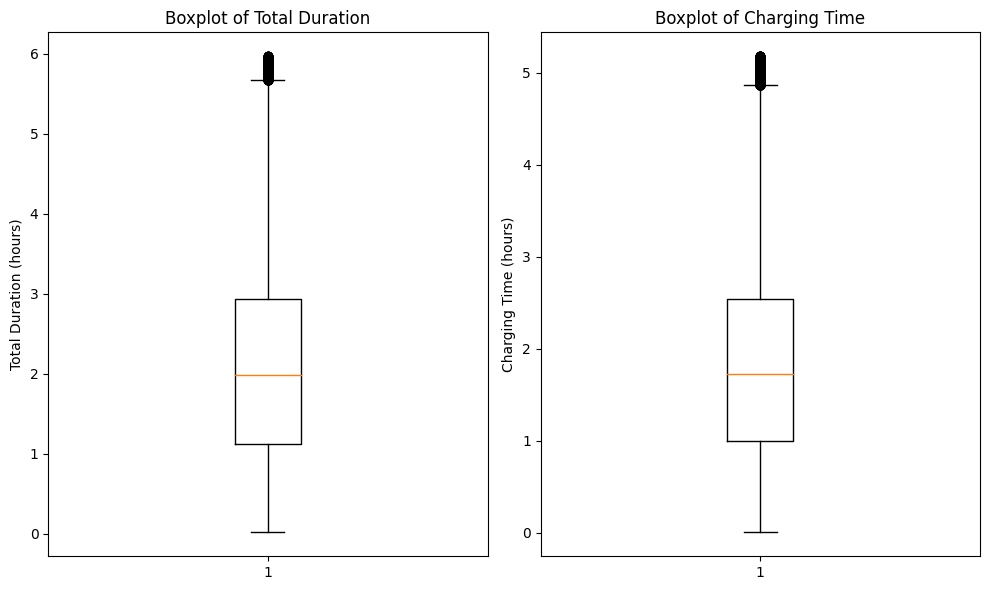

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for Total Duration and Charging Time
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered['Total Duration'].dt.total_seconds() / 3600)
plt.title('Boxplot of Total Duration')
plt.ylabel('Total Duration (hours)')

plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['Charging Time'].dt.total_seconds() / 3600)
plt.title('Boxplot of Charging Time')
plt.ylabel('Charging Time (hours)')

plt.tight_layout()
plt.show()


In [ ]:
df.columns


Index(['ZipCode', 'Charging Station', 'Address', 'City', 'State', 'Latitude',
       'Longitude', 'Start Date', 'End Date', 'Total Duration',
       'Charging Time', 'Charging Port Type', 'Charging Ports', 'Plug Type',
       'Energy Consumed', 'Charges', 'Total Duration_zscore',
       'Charging Time_zscore', 'Start Date_ordinal', 'Start Date_zscore',
       'End Date_ordinal', 'End Date_zscore'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Charging Station'] = label_encoder.fit_transform(df['Charging Station'])
df['Address'] = label_encoder.fit_transform(df['Address'])
df['City'] = label_encoder.fit_transform(df['City'])
df['State'] = label_encoder.fit_transform(df['State'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259375 entries, 0 to 259414
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   ZipCode                259375 non-null  int64          
 1   Charging Station       259375 non-null  int64          
 2   Address                259375 non-null  int64          
 3   City                   259375 non-null  int64          
 4   State                  259375 non-null  int64          
 5   Latitude               259375 non-null  float64        
 6   Longitude              259375 non-null  float64        
 7   Start Date             259375 non-null  datetime64[ns] 
 8   End Date               259375 non-null  datetime64[ns] 
 9   Total Duration         259375 non-null  timedelta64[ns]
 10  Charging Time          259375 non-null  timedelta64[ns]
 11  Charging Port Type     259366 non-null  object         
 12  Charging Ports         259375 non-n

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Assuming 'Charging Time' is your feature and 'Energy Consumed' is your target variable
X = df[['Charging Time_zscore', 'Start Date_zscore','Total Duration_zscore']]  # Features
y = df['Energy Consumed']   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## XGBRegressor

In [ ]:
# Initialize and train the XGBRegressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 9.568971155941254
R-squared: 0.8139429238022959


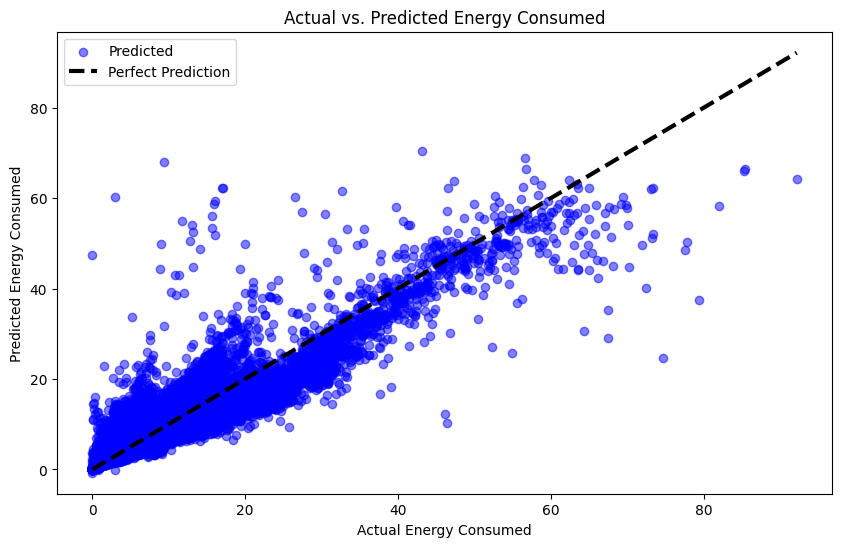

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Energy Consumed')
plt.ylabel('Predicted Energy Consumed')
plt.title('Actual vs. Predicted Energy Consumed')
plt.legend()
plt.show()


Mean Squared Error: 9.568971155941254
R-squared: 0.8139429238022959


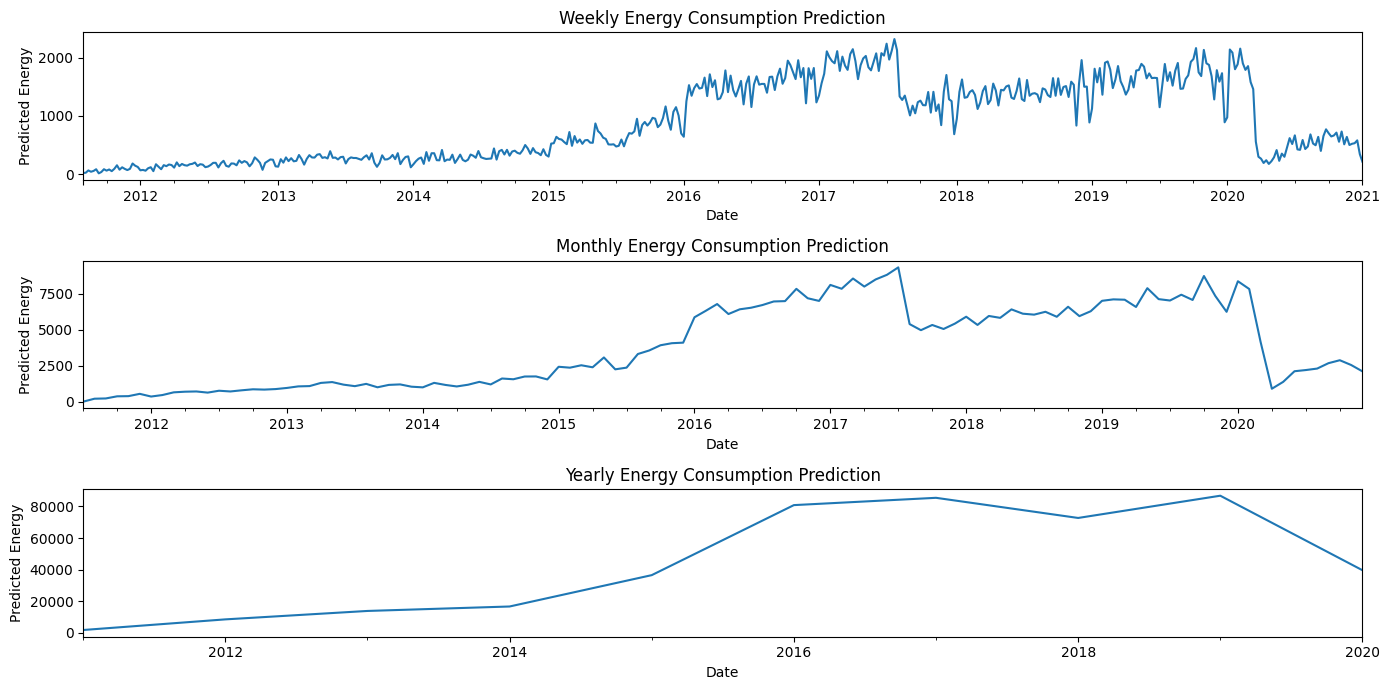

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming these are your features, including the necessary date and z-scores
features = ['Charging Time_zscore', 'Start Date_zscore', 'Total Duration_zscore']
X = df[features]  # Features
y = df['Energy Consumed']   # Target variable

# Retain Start Date for plotting
dates = df['Start Date']

# Split the data into training and testing sets, ensuring dates align
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Prepare data for plotting
predictions_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted Energy': y_pred
})

# Set date as the index
predictions_df.set_index('Date', inplace=True)

# Resample and aggregate predicted energy consumption
weekly_data = predictions_df['Predicted Energy'].resample('W').sum()
monthly_data = predictions_df['Predicted Energy'].resample('M').sum()
yearly_data = predictions_df['Predicted Energy'].resample('A').sum()

# Plotting
plt.figure(figsize=(14, 7))

# Weekly plot
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
weekly_data.plot(title='Weekly Energy Consumption Prediction')
plt.ylabel('Predicted Energy')

# Monthly plot
plt.subplot(3, 1, 2)
monthly_data.plot(title='Monthly Energy Consumption Prediction')
plt.ylabel('Predicted Energy')

# Yearly plot
plt.subplot(3, 1, 3)
yearly_data.plot(title='Yearly Energy Consumption Prediction')
plt.ylabel('Predicted Energy')

plt.tight_layout()
plt.show()


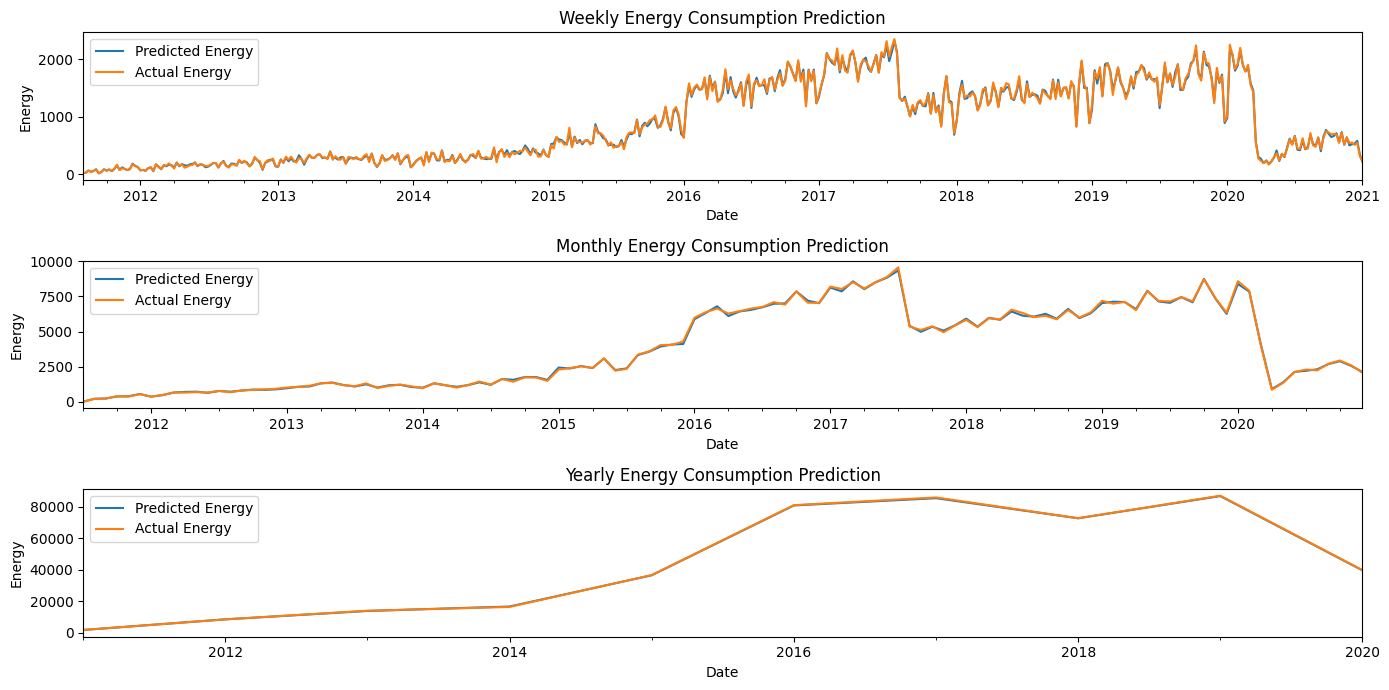

In [ ]:
# Assuming you have already trained the model and have predictions
# Prepare data for plotting
predictions_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted Energy': y_pred,
    'Actual Energy': y_test.values  # Assuming y_test is a pandas Series
})

# Set date as the index
predictions_df.set_index('Date', inplace=True)

# Resample and aggregate predicted and actual energy consumption
weekly_data_pred = predictions_df['Predicted Energy'].resample('W').sum()
weekly_data_actual = predictions_df['Actual Energy'].resample('W').sum()
monthly_data_pred = predictions_df['Predicted Energy'].resample('M').sum()
monthly_data_actual = predictions_df['Actual Energy'].resample('M').sum()
yearly_data_pred = predictions_df['Predicted Energy'].resample('A').sum()
yearly_data_actual = predictions_df['Actual Energy'].resample('A').sum()

# Plotting
plt.figure(figsize=(14, 7))

# Weekly plot
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
weekly_data_pred.plot(label='Predicted Energy')
weekly_data_actual.plot(label='Actual Energy')
plt.title('Weekly Energy Consumption Prediction')
plt.ylabel('Energy')
plt.legend()

# Monthly plot
plt.subplot(3, 1, 2)
monthly_data_pred.plot(label='Predicted Energy')
monthly_data_actual.plot(label='Actual Energy')
plt.title('Monthly Energy Consumption Prediction')
plt.ylabel('Energy')
plt.legend()

# Yearly plot
plt.subplot(3, 1, 3)
yearly_data_pred.plot(label='Predicted Energy')
yearly_data_actual.plot(label='Actual Energy')
plt.title('Yearly Energy Consumption Prediction')
plt.ylabel('Energy')
plt.legend()

plt.tight_layout()
plt.show()


##  LightGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

# Initialize and train the LGBMRegressor model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lgbm = lgbm_model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Mean Squared Error:", mse_lgbm)
print("LightGBM R-squared:", r2_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 207500, number of used features: 3
[LightGBM] [Info] Start training from score 8.539643
LightGBM Mean Squared Error: 9.601623028927088
LightGBM R-squared: 0.8133080476049368


## AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the AdaBoostRegressor model
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_ada = ada_model.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Mean Squared Error:", mse_ada)
print("AdaBoost R-squared:", r2_ada)


AdaBoost Mean Squared Error: 13.663529286109302
AdaBoost R-squared: 0.7343291908726486


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 9.979537198804968
Random Forest R-squared: 0.8059599634321148


In [ ]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R-squared:", r2_svr)


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gbm = gbm_model.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("GBM Mean Squared Error:", mse_gbm)
print("GBM R-squared:", r2_gbm)


## Deep learning model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Charging Time' is your feature and 'Energy Consumed' is your target variable
X = df[['Charging Time_zscore']]  # Features
y = df['Energy Consumed']   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's often a good idea to scale features for neural network training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: No activation function is used for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Neural Network Mean Squared Error:", mse)
print("Neural Network R-squared:", r2)


Epoch 1/5
6485/6485 [==============================] - 23s 3ms/step - loss: 13.6806
Epoch 2/5
6485/6485 [==============================] - 20s 3ms/step - loss: 12.2760
Epoch 3/5
6485/6485 [==============================] - 19s 3ms/step - loss: 12.1784
Epoch 4/5
6485/6485 [==============================] - 20s 3ms/step - loss: 12.0544
Epoch 5/5
1622/1622 [==============================] - 4s 2ms/step
Neural Network Mean Squared Error: 11.567073381155124
Neural Network R-squared: 0.7750922415388639
